In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qubit_zz_coupling.core import setup_operators, solve_t1, solve_t2, make_population, plot_t1, plot_t2
from qutip import basis, tensor
from scipy.optimize import curve_fit

In [3]:
# Define system parameters
SYSTEM_PARAMS_NOCOUP = {
    "fq1": 3.2,  # GHz, Qubit 1 frequency
    "fq2": 3.35,  # GHz, Qubit 2 frequency
    "fTLS": 3.2,  # GHz, TLS frequency (resonant with Qubit 1)
    "JTLS": 0.05,  # Coupling strength between Qubit 1 and TLS
    "relaxation": {"q1": 1/20, "q2": 1/25, "TLS": 1/5},  # Relaxation rates
    "dephasing": {"q1": 1/15, "q2": 1/18, "TLS": 1/3},  # Dephasing rates
    "Jzz": 0.0, # Jzz coupling
    "Jxx": 0.0, # Jxx coupling
    "time_points": np.linspace(0, 30, 100)  # Time points in μs
}

H, c_ops, sz_q1, sz_q2, sx_q1, sx_q2 = setup_operators(system_params=SYSTEM_PARAMS_NOCOUP)

# get times
tlist = SYSTEM_PARAMS_NOCOUP["time_points"]

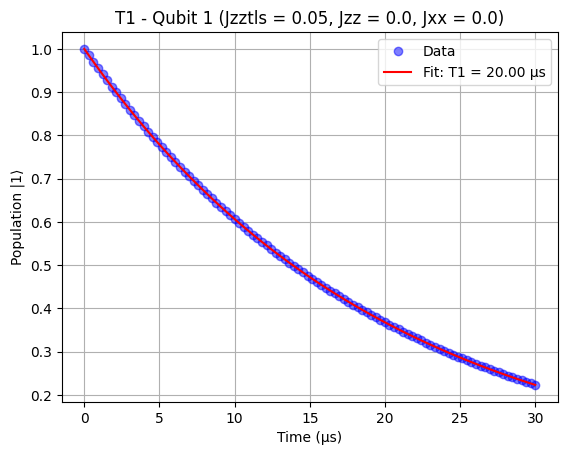

In [4]:
# T1 measurement for Qubit 1 
psi0 = tensor(basis(2, 0), basis(2, 1), basis(2, 1))  # |0⟩|1⟩|1⟩
solve_t1(H, psi0, tlist, c_ops, [sz_q1], ret_pop=False)
plot_t1(H, psi0, tlist, c_ops, [sz_q1], "Qubit 1", SYSTEM_PARAMS_NOCOUP)
plt.show()

[5.00012498e-01 1.08944080e+01 3.10000553e+00 2.13092637e-05
 4.99999870e-01]


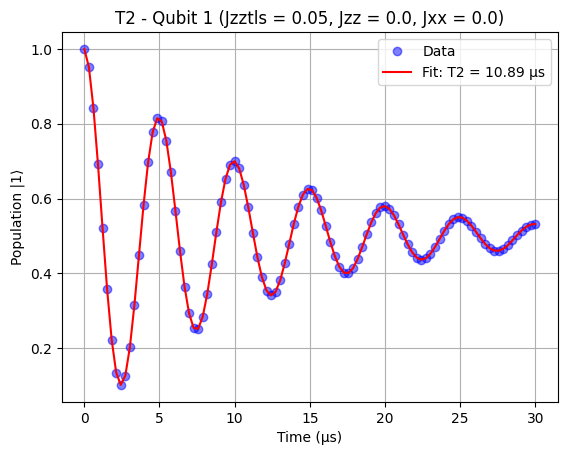

In [ ]:
# T2 measurement for Qubit 1 
psi0 = tensor((basis(2, 0) + basis(2, 1)).unit(), basis(2, 1), basis(2, 1))  # |+⟩|1⟩|1⟩


first_guess = [0.5, 1.0 / SYSTEM_PARAMS_NOCOUP["dephasing"]["q1"], # best guess
                  SYSTEM_PARAMS_NOCOUP["fq1"], 0.0, 0.5]

solve_t2(H, psi0, tlist, c_ops, [sx_q1], first_guess, ret_pop=False)
plot_t2(H, psi0, tlist, c_ops, [sx_q1], first_guess, "Qubit 1", SYSTEM_PARAMS_NOCOUP)
plt.show()